In [1]:
from dataset import DataLoader, LabeledPathListingGenerator, DataSet
from matplotlib import pyplot as plt
# label_generator = LabelGenerator("dataset", ['avi'])
# data_loader = label_generator.gnerate_labels("video_label.pkl", "label_encoding.pkl")


data_loader = DataLoader("video_label.pkl", "label_encoding.pkl")
train_set, val_set, test_set = data_loader.generate_split([0.7,0.2,0.1])
# print(train_set.get_X())
# print(train_set.get_Y())

generator = train_set.get_batch_generator(2, 50)


In [2]:
example = next(generator)
# example = generator
# train_set.width

In [5]:
print(example[0].shape)
print(example[0][0].shape)



(2, 50, 240, 320, 1)
(50, 240, 320, 1)


(240, 320, 1)
(240, 320)


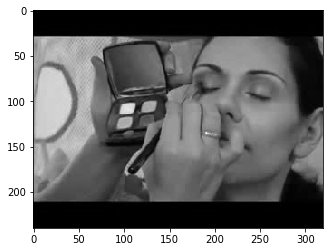

In [14]:
import numpy as np
print(example[0][0][0].shape)
a = np.reshape(example[0][0][0], (240, 320))
print(a.shape)
plt.imshow(a, cmap='gray')

In [15]:
from keras.utils import np_utils, generic_utils
from keras.layers.convolutional import Conv3D
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Flatten, Dense, Lambda, Cropping2D, Activation, Dropout
from keras.layers.convolutional import Convolution3D
from keras.layers.pooling import MaxPooling3D

def build_model(class_count, frame_count, width, height):
    model = Sequential()

    model.add(Conv3D(1, kernel_size=(3, 7, 7), input_shape=(frame_count, height, width, 1), activation='relu'))
    model.add(MaxPooling3D(pool_size=(3, 3, 3)))
    model.add(Dropout(0.75))

    # model.add(Conv3D(64, kernel_size=(3, 7, 7), activation='relu' ))
    # model.add(Dropout(0.75))
    # 
    # model.add(Conv3D(128, kernel_size=(1 ,7, 7), activation='relu' ))
    # model.add(Dropout(0.5))
    # 
    # model.add(Conv3D(256, kernel_size=(1, 7, 7), activation='relu' ))
    # model.add(Dropout(0.5))

    model.add(Flatten())

    # model.add(Dense(128, init='normal', activation='relu'))
    # model.add(Dropout(0.75))

    model.add(Dense(class_count, init='normal'))
    model.add(Activation('softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam')

    model.summary()

    return model;

Using TensorFlow backend.


In [17]:
frame_count = 50
batch_size = 10
class_count = 2
model = build_model(class_count, frame_count, train_set.width, train_set.height)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_2 (Conv3D)            (None, 48, 234, 314, 1)   148       
_________________________________________________________________
max_pooling3d_2 (MaxPooling3 (None, 16, 78, 104, 1)    0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 78, 104, 1)    0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 129792)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 259586    
_________________________________________________________________
activation_2 (Activation)    (None, 2)                 0         
Total params: 259,734
Trainable params: 259,734
Non-trainable params: 0
_________________________________________________________________


/home/uniquetrij/miniconda3/envs/action-detection/lib/python3.5/site-packages/ipykernel_launcher.py:30: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(2, kernel_initializer="normal")`


In [18]:
hist = model.fit_generator(train_set.get_batch_generator(batch_size,frame_count),
                       validation_data=val_set.get_batch_generator(batch_size,frame_count),
                       epochs=10,
                              steps_per_epoch=train_set.size/batch_size,
                              validation_steps=val_set.size/batch_size)

Epoch 1/10
